In [18]:
#All the Imports needed for the files to Run.

import struct
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [2]:
#Read the file from the path
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

In [3]:
#Get the data into variables
x_train = read_idx("./fashion_mnist/train-images-idx3-ubyte")
y_train = read_idx("./fashion_mnist/train-labels-idx1-ubyte")
x_test = read_idx("./fashion_mnist/t10k-images-idx3-ubyte")
y_test = read_idx("./fashion_mnist/t10k-labels-idx1-ubyte")

In [8]:
#Lets analyse the Data.
print('The shape of x_train is {}'.format(x_train.shape))
print('The size of Image is {} x {} = {}'.format(x_train.shape[1], x_train.shape[2], x_train.shape[1]*x_train.shape[2]))
print('The samples in Training Data are {}'.format(x_train.shape[0]))
print('The samples in Test Data are {}'.format(x_test.shape[0]))

The shape of x_train is (60000, 28, 28)
The size of Image is 28 x 28 = 784
The samples in Training Data are 60000
The samples in Test Data are 10000


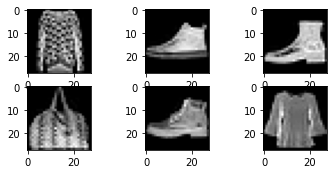

In [17]:
#Lets visualise the Data
num_visualisation = 6
for i in range(num_visualisation):
    subplot_num = 331 + i
    plt.subplot(subplot_num)
    random_num = np.random.randint(0,len(x_train))
    plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
#Declaring Batch size and Number of epochs.

batch_size = 128
epochs = 2

#Pre process the data 
img_rows = x_test[0].shape[0]
img_cols = x_test[1].shape[0]

#Lets reshape the Image, It has shape of (60000, 28, 28) to (60000, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


28 28
